In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from dateutil.relativedelta import relativedelta
from datetime import *

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
import os
os.getcwd()

'C:\\Users\\Administrator\\Desktop\\python_begins\\WAVVE'

## 서비스 데이터 읽기 : 69,708 rows, 14 columns
  - Rephurchase 정보 포함

In [4]:
df_service = pd.read_csv('Train/train_service.csv', parse_dates=['registerdate', 'enddate'], infer_datetime_format=True)
df_service.sample(3)

,uno,registerdate,enddate,productcode,pgamount,chargetypeid,concurrentwatchcount,promo_100,coinReceived,Repurchase,devicetypeid,isauth,gender,agegroup
43591,5dd0e0e7b42b6560ca6fbb977c43a2b2037e64a599e5f2...,2021-03-08 23:36:48,2021-04-08 23:36:48,pk_2027,100.00,151,4,O,NaN,O,android,Y,M,30
38368,950ab6dc21a6ce5832fedf6ee757b583805840effc0a74...,2021-03-09 20:13:16,2021-04-09 20:13:16,pk_1487,7900.00,131,1,NaN,NaN,X,mobile,NaN,F,40
27467,19ed4149a632991b8697c613a657735b7b71fd81812199...,2021-03-08 01:48:43,2021-04-08 01:48:43,pk_1508,9.99,140,1,NaN,NaN,O,ios,NaN,NaN,40


In [5]:
df_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69708 entries, 0 to 69707
Data columns (total 14 columns):
uno                     69708 non-null object
registerdate            69708 non-null datetime64[ns]
enddate                 69708 non-null datetime64[ns]
productcode             69708 non-null object
pgamount                69708 non-null float64
chargetypeid            69708 non-null int64
concurrentwatchcount    69708 non-null int64
promo_100               35729 non-null object
coinReceived            12564 non-null object
Repurchase              69708 non-null object
devicetypeid            69708 non-null object
isauth                  51727 non-null object
gender                  58228 non-null object
agegroup                69708 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(3), object(8)
memory usage: 7.4+ MB


## 서비스 데이터 Unique Value

In [6]:
# Column 별 unique values
for column in df_service.columns.values.tolist():
    unique_value_list = df_service[column].unique()
    print(f'Column <{column}>', len(unique_value_list))
    print(unique_value_list[:10], '\n')

Column <uno> 69145
['b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3d75c03d99136f8e0d07bb55627eac3e9a288c20c74cee8641bbdff95108d737b7df108f281d6bbba29'
 '4ec765db76545c1d6dda9f421590bf9d02f584009f8d92100afeef4594ee72306b661c43d19086f82f85f02bbb5716280f52bb7f0fde823a0656a830a0e6e41f'
 '304cacae950e53952afebff0b212f5bfef6a5a0abb4c450879e853055b88063bfc32ee48bea746e952c79f1e1d619db50570991d74d5e19afeb32c5ce1b630dc'
 '4f86d917c53cb6bd8949f76dba7260311e8c1748748a028efd353137a1d459f7c12f6c2af10aec81da39c3bfe8a2d913fd24c26403b0aecba90b11ed2611ad5c'
 '445fb8813626d3d49b94b5be58cd76d80ed31fa94f8372618142c34471e001896e2d3b02a04ad6e2ceb35d91f0305d51eac4ed30a6925db9fcf37d2b8521a2cf'
 'd87ce5040893986019ea58ba1d1df033b8bc6dc03c11634b7bd47c36a5f5c8623993a63f306321dd0f3b69284b006a2643bc4e7ae55d71131389fc176b3db39b'
 '01b16f9f7ff29b48b1ee0d1a89d1eb9662474e5eedb8c2d967ea43793d3f9d03a560771374901302484d7598e771f39abbd8766c54f38753186b3f17eee9fb48'
 '6722de45f1c29af6057973492fed22c05e63a7bc90203d5120b82dc

## 서비스 데이터 결측치 및 이상치 처리

In [7]:
filled_service = df_service

In [8]:
service_missing_info = pd.DataFrame(filled_service.isnull().sum().sort_values(ascending=False), columns=['missing num'])
service_missing_info['%'] = service_missing_info['missing num']/filled_service.shape[0]*100
service_missing_info

,missing num,%
coinReceived,57144,81.976244
promo_100,33979,48.744764
isauth,17981,25.794744
gender,11480,16.468698
agegroup,0,0.000000
devicetypeid,0,0.000000
Repurchase,0,0.000000
concurrentwatchcount,0,0.000000
chargetypeid,0,0.000000
pgamount,0,0.000000


In [9]:
# gender null --> N
filled_service['gender'] = filled_service['gender'].fillna('N')
filled_service['gender'].value_counts()

F    36591
M    21637
N    11480
Name: gender, dtype: int64

In [10]:
# agegroup outlier (0살, 950살) --> mean
filled_service['agegroup'].value_counts().sort_index()

0        608
5          2
10         1
15      1227
20      9562
25     12099
30     10435
35      6905
40     19281
45      3739
50      2725
55      1385
60       885
65       414
70       209
75       129
80        70
85        20
90         9
95         1
120        1
950        1
Name: agegroup, dtype: int64

In [11]:
filled_service.shape

(69708, 14)

In [12]:
age_mean = filled_service.loc[(filled_service['agegroup']<950) & (filled_service['agegroup']>0), 'agegroup'].mean()
age_mean

33.74035803701935

In [13]:
filled_service['agegroup'] = filled_service['agegroup'].replace(950, 30)
filled_service['agegroup'] = filled_service['agegroup'].replace(0, 30)
filled_service['agegroup'].value_counts().sort_index()

5          2
10         1
15      1227
20      9562
25     12099
30     11044
35      6905
40     19281
45      3739
50      2725
55      1385
60       885
65       414
70       209
75       129
80        70
85        20
90         9
95         1
120        1
Name: agegroup, dtype: int64

In [14]:
# pgamount US Dollar --> 원화
filled_service['pgamount'].value_counts().sort_index()

7.69            3
9.89           17
9.99         8313
10.99         266
13.19          12
13.49        2192
14.29          64
16.49         861
17.59           7
18.69           5
19.79           2
20.49           4
20.89           3
21.99           8
24.19           3
26.39           1
27.49           3
29.69           2
32.99           1
100.00      35729
2900.00         2
3350.00        16
3950.00       487
4900.00         9
5450.00       134
5700.00         2
5900.00        38
6210.00        19
6700.00       262
6900.00        99
6950.00       168
7900.00     12679
8100.00         1
8900.00         4
9000.00         9
9200.00         2
9810.00         1
9900.00         5
10300.00        3
10400.00        1
10900.00     5789
11550.00        1
11610.00        1
11800.00        2
12900.00        2
13750.00      119
13900.00     2350
14200.00        1
16400.00        2
16900.00        4
Name: pgamount, dtype: int64

In [15]:
filled_service.loc[(filled_service['pgamount'] < 100), 'pgamount'] = filled_service['pgamount'] * 1120
filled_service['pgamount'].value_counts().sort_index()

100.0      35729
2900.0         2
3350.0        16
3950.0       487
4900.0         9
5450.0       134
5700.0         2
5900.0        38
6210.0        19
6700.0       262
6900.0        99
6950.0       168
7900.0     12679
8100.0         1
8612.8         3
8900.0         4
9000.0         9
9200.0         2
9810.0         1
9900.0         5
10300.0        3
10400.0        1
10900.0     5789
11076.8       17
11188.8     8313
11550.0        1
11610.0        1
11800.0        2
12308.8      266
12900.0        2
13750.0      119
13900.0     2350
14200.0        1
14772.8       12
15108.8     2192
16004.8       64
16400.0        2
16900.0        4
18468.8      861
19700.8        7
20932.8        5
22164.8        2
22948.8        4
23396.8        3
24628.8        8
27092.8        3
29556.8        1
30788.8        3
33252.8        2
36948.8        1
Name: pgamount, dtype: int64

In [16]:
# 나머지 결측치는 X로 처리 (O or null인 경우)
filled_service.isnull().sum()

uno                         0
registerdate                0
enddate                     0
productcode                 0
pgamount                    0
chargetypeid                0
concurrentwatchcount        0
promo_100               33979
coinReceived            57144
Repurchase                  0
devicetypeid                0
isauth                  17981
gender                      0
agegroup                    0
dtype: int64

In [17]:
filled_service = filled_service.fillna('X')
filled_service.isnull().sum()

uno                     0
registerdate            0
enddate                 0
productcode             0
pgamount                0
chargetypeid            0
concurrentwatchcount    0
promo_100               0
coinReceived            0
Repurchase              0
devicetypeid            0
isauth                  0
gender                  0
agegroup                0
dtype: int64

In [18]:
os.getcwd()

'C:\\Users\\Administrator\\Desktop\\python_begins\\WAVVE'

In [19]:
filled_service.head(5)

,uno,registerdate,enddate,productcode,pgamount,chargetypeid,concurrentwatchcount,promo_100,coinReceived,Repurchase,devicetypeid,isauth,gender,agegroup
0,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-09 16:31:15,2021-04-09 16:31:15,pk_1487,7900.0,134,1,X,X,X,android,Y,F,45
1,4ec765db76545c1d6dda9f421590bf9d02f584009f8d92...,2021-03-09 14:33:07,2021-04-09 14:33:07,pk_1487,100.0,190,1,O,O,X,pc,Y,F,25
2,304cacae950e53952afebff0b212f5bfef6a5a0abb4c45...,2021-03-09 12:00:01,2021-04-09 12:00:01,pk_2026,10900.0,151,2,X,O,O,android,Y,F,35
3,4f86d917c53cb6bd8949f76dba7260311e8c1748748a02...,2021-03-09 22:23:12,2021-04-09 22:23:12,pk_1487,100.0,132,1,O,X,X,android,X,F,55
4,445fb8813626d3d49b94b5be58cd76d80ed31fa94f8372...,2021-03-09 10:32:36,2021-04-09 10:32:36,pk_1508,11188.8,140,1,X,X,O,ios,X,N,40


## numeric으로 전환

In [20]:
numeric_service = filled_service.copy()
numeric_service['Repurchase'].replace('O', 0, inplace=True)
numeric_service['Repurchase'].replace('X', 1, inplace=True)
numeric_service.rename(columns={'Repurchase':"Unsubscription"}, inplace=True)
numeric_service.head(5)

,uno,registerdate,enddate,productcode,pgamount,chargetypeid,concurrentwatchcount,promo_100,coinReceived,Unsubscription,devicetypeid,isauth,gender,agegroup
0,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-09 16:31:15,2021-04-09 16:31:15,pk_1487,7900.0,134,1,X,X,1,android,Y,F,45
1,4ec765db76545c1d6dda9f421590bf9d02f584009f8d92...,2021-03-09 14:33:07,2021-04-09 14:33:07,pk_1487,100.0,190,1,O,O,1,pc,Y,F,25
2,304cacae950e53952afebff0b212f5bfef6a5a0abb4c45...,2021-03-09 12:00:01,2021-04-09 12:00:01,pk_2026,10900.0,151,2,X,O,0,android,Y,F,35
3,4f86d917c53cb6bd8949f76dba7260311e8c1748748a02...,2021-03-09 22:23:12,2021-04-09 22:23:12,pk_1487,100.0,132,1,O,X,1,android,X,F,55
4,445fb8813626d3d49b94b5be58cd76d80ed31fa94f8372...,2021-03-09 10:32:36,2021-04-09 10:32:36,pk_1508,11188.8,140,1,X,X,0,ios,X,N,40


In [21]:
numeric_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69708 entries, 0 to 69707
Data columns (total 14 columns):
uno                     69708 non-null object
registerdate            69708 non-null datetime64[ns]
enddate                 69708 non-null datetime64[ns]
productcode             69708 non-null object
pgamount                69708 non-null float64
chargetypeid            69708 non-null int64
concurrentwatchcount    69708 non-null int64
promo_100               69708 non-null object
coinReceived            69708 non-null object
Unsubscription          69708 non-null int64
devicetypeid            69708 non-null object
isauth                  69708 non-null object
gender                  69708 non-null object
agegroup                69708 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(4), object(7)
memory usage: 7.4+ MB


In [22]:
column_list = numeric_service.columns.values.tolist()
column_list.remove('uno')
column_list.remove('productcode')

for col in column_list:
    if numeric_service[col].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(numeric_service[col].values))
        numeric_service[col] = lbl.transform(numeric_service[col].values)
        
numeric_service.sample(5)

,uno,registerdate,enddate,productcode,pgamount,chargetypeid,concurrentwatchcount,promo_100,coinReceived,Unsubscription,devicetypeid,isauth,gender,agegroup
31538,296df4459500419ec5c833462988a4d768c08b2de1b66f...,2021-03-02 00:46:37,2021-04-02 00:46:37,pk_1488,100.0,134,2,0,1,0,7,1,1,35
45449,22b0f203455994541a7e7a012965c034d6f8a8a4fc16bd...,2021-03-04 19:33:05,2021-04-04 19:33:05,pk_1508,11188.8,140,1,1,1,1,1,1,1,40
29401,4c5f6cf03aae5e9717e6f722506a3c6020850da8e420e9...,2021-03-01 16:29:30,2021-04-01 16:29:30,pk_1494,13750.0,134,1,1,1,0,7,1,1,40
68812,9e285d607a466e055fc3fd04a98bed9e0b02e1eaaa82f6...,2021-03-12 17:57:16,2021-04-12 17:57:16,pk_2027,100.0,151,4,0,1,0,0,1,0,25
16942,6565342d04d7e6aae0b5a9fc365f5bbf6cbd2c7fc944bb...,2021-03-05 22:18:28,2021-04-05 22:18:28,pk_2025,7900.0,151,1,1,1,0,0,0,0,25


In [23]:
numeric_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69708 entries, 0 to 69707
Data columns (total 14 columns):
uno                     69708 non-null object
registerdate            69708 non-null datetime64[ns]
enddate                 69708 non-null datetime64[ns]
productcode             69708 non-null object
pgamount                69708 non-null float64
chargetypeid            69708 non-null int64
concurrentwatchcount    69708 non-null int64
promo_100               69708 non-null int32
coinReceived            69708 non-null int32
Unsubscription          69708 non-null int64
devicetypeid            69708 non-null int32
isauth                  69708 non-null int32
gender                  69708 non-null int32
agegroup                69708 non-null int64
dtypes: datetime64[ns](2), float64(1), int32(5), int64(4), object(2)
memory usage: 6.1+ MB


## numeric_service 저장

In [24]:
# numeric_service.to_csv(path_or_buf="Train/numeric_service.csv", index=False)

## numeric_service 불러오기

In [25]:
# numeric_service = pd.read_csv("Train/numeric_service.csv")

In [26]:
# numeric_service

In [27]:
# numeric_service.columns

In [28]:
numeric_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69708 entries, 0 to 69707
Data columns (total 14 columns):
uno                     69708 non-null object
registerdate            69708 non-null datetime64[ns]
enddate                 69708 non-null datetime64[ns]
productcode             69708 non-null object
pgamount                69708 non-null float64
chargetypeid            69708 non-null int64
concurrentwatchcount    69708 non-null int64
promo_100               69708 non-null int32
coinReceived            69708 non-null int32
Unsubscription          69708 non-null int64
devicetypeid            69708 non-null int32
isauth                  69708 non-null int32
gender                  69708 non-null int32
agegroup                69708 non-null int64
dtypes: datetime64[ns](2), float64(1), int32(5), int64(4), object(2)
memory usage: 6.1+ MB


## 시청 이력 데이터 읽기 : 7,987,609 rows

In [29]:
df_bookmark = pd.read_csv("Train/train_bookmark.csv", parse_dates=['dates'], infer_datetime_format=True)


In [30]:
ex_uno = df_bookmark.loc[0, 'uno']
df_bookmark[df_bookmark['uno']==ex_uno]

,uno,dates,hour,channeltype,programid,title,contentid,contentnumber,section,viewtime,devicetype
0,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-20,17,V,S01_P453505934,펜트하우스 2,S01_E454434900.1,9,1,1650,4
1,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-13,15,V,M_T60403G,밥이 되어라,M_EP202103053628.1,42,1,1670,4
2,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-13,6,V,S01_P453505934,펜트하우스 2,S01_E454336041.1,7,1,1800,4
3,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-16,19,V,K02_T2020-0370,오! 삼광빌라!,K02_PS-2021033047-01-000.1,50,1,2080,4
4,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-18,7,V,M_T60403G,밥이 되어라,M_EP202103123716.1,43,1,1680,4
5,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-12,6,V,S01_P453505934,펜트하우스 2,S01_E454130151.1,4,1,10,4
6,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-14,10,V,K02_T2020-0370,오! 삼광빌라!,K02_PS-2021033047-01-000.1,50,1,1290,4
7,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-28,7,V,S01_P453505934,펜트하우스 2,S01_E454542949.1,12,1,480,4
8,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-13,9,V,S01_P453505934,펜트하우스 2,S01_E454229316.1,5,1,40,4
9,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-12,5,V,S01_P453505934,펜트하우스 2,S01_E454229327.1,6,1,1720,4


## 시청 이력 데이터 Unique Value

In [31]:
# for column in df_bookmark.columns.values.tolist():
#     unique_value_list = df_bookmark[column].unique()
#     print(f'Column <{column}>', len(unique_value_list))
#     print(unique_value_list[:10], '\n')

## 시청 이력 데이터 가공

In [32]:
# (1) 고객별 서비스 가입 이력 수
df_feature_1 = numeric_service.groupby(by='uno', as_index=False).registerdate.count()
df_feature_1.rename(columns={'registerdate':'REG_CNT'}, inplace=True)

# (2) 고객별 서비스 가입 이력 상품 수
df_feature_2 = numeric_service[['uno','productcode']]
df_feature_2 = numeric_service.drop_duplicates() # 고객별 동일 상품 제거
df_feature_2 = numeric_service.groupby(by='uno', as_index=False).productcode.count()
df_feature_2.rename(columns={'productcode':'PRD_CNT'}, inplace=True)

# (3) 고객별 시청 건수 (1시간 단위)
df_feature_3 = df_bookmark.groupby(by='uno', as_index=False).dates.count()
df_feature_3.rename(columns={'dates':'BM_CNT'}, inplace=True)

# (4) 고객별 시청 총 시간
df_feature_4 = df_bookmark.groupby(by='uno', as_index=False).viewtime.sum()
df_feature_4.rename(columns={'viewtime':'VT_TOT'}, inplace=True)

# (5) 고객별 시청 평균 시간
df_feature_5 = df_bookmark.groupby(by='uno', as_index=False).viewtime.mean()
df_feature_5.rename(columns={'viewtime':'VT_AVG'}, inplace=True)

# (6) 고객별 시청 채널 수
df_feature_6 = df_bookmark[['uno','channeltype']]
df_feature_6 = df_feature_6.drop_duplicates() # 고객별 동일 채널 제거
df_feature_6 = df_feature_6.groupby(by='uno', as_index=False).channeltype.count()
df_feature_6.rename(columns={'channeltype':'CH_CNT'}, inplace=True)

# (7) 고객별 시청 프로그램 수
df_feature_7 = df_bookmark[['uno','programid']]
df_feature_7 = df_feature_7.drop_duplicates() # 고객별 동일 프로그램 제거
df_feature_7 = df_feature_7.groupby(by='uno', as_index=False).programid.count()
df_feature_7.rename(columns={'programid':'PRG_CNT'}, inplace=True)

# (8) 고객별 시청 디바이스 수
df_feature_8 = df_bookmark[['uno','devicetype']]
df_feature_8 = df_feature_8.drop_duplicates() # 고객별 동일 프로그램 제거
df_feature_8 = df_feature_8.groupby(by='uno', as_index=False).devicetype.count()
df_feature_8.rename(columns={'devicetype':'DEV_CNT'}, inplace=True)

In [33]:
# (9) enddate - registerdate
df_feature_9 = numeric_service[['uno', 'enddate', 'registerdate', 'Unsubscription']]
df_feature_9['REG_END'] = df_feature_9['enddate'] - df_feature_9['registerdate']
df_feature_9 = df_feature_9[['uno', 'registerdate', 'REG_END']]
df_feature_9['REG_END'] = df_feature_9['REG_END'].astype('str')
df_feature_9['REG_END'] = df_feature_9.REG_END.str.split(' days').str[0]
df_feature_9['REG_END'] = df_feature_9['REG_END'].astype('int')

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
# # (10) enddate - lastview

# end_enddate = numeric_service.groupby(by='uno', as_index=False).enddate.max()
# lastview = df_bookmark.groupby(by='uno', as_index=False).dates.max()

# lastview_enddate = pd.merge(end_enddate, lastview, how='left')
# lastview_enddate.rename(columns={'dates':'last_view'}, inplace=True)
# lastview_enddate['LAST_V'] = lastview_enddate['enddate'] - lastview_enddate['last_view']
# lastview_enddate['LAST_V'] = lastview_enddate['LAST_V'].dt.days

# # lastview_enddate['LAST_V'] = lastview_enddate['LAST_V'].fillna(int(40))

# df_feature_10 = lastview_enddate[['uno', 'LAST_V']]

# df_feature_10.loc[df_feature_10['LAST_V']<20, 'LAST_V'] = 0
# df_feature_10.loc[df_feature_10['LAST_V']>=20, 'LAST_V'] = 1
# df_feature_10['LAST_V'] = df_feature_10['LAST_V'].fillna(2)

In [35]:
# (11) 최다 장르

df_feature_11 = pd.DataFrame(df_bookmark.groupby(by=['uno']).channeltype.agg('max'))
df_feature_11.rename(columns={'channeltype':'GENRE'}, inplace=True)

In [36]:
# (12) 주별 시청시간

more_reg_uno = df_feature_1[df_feature_1['REG_CNT']>1]['uno']
more_reg = numeric_service[numeric_service['uno'].isin(more_reg_uno)].sort_values(by='uno')
more_reg = pd.DataFrame(more_reg.groupby(by=['uno'], as_index=False).registerdate.agg('max'))

one_reg = numeric_service[~numeric_service['uno'].isin(more_reg_uno)]
one_reg = one_reg[['uno', 'registerdate']]

reg_date = pd.concat([more_reg, one_reg], axis=0)
bookmark_reg_date = pd.merge(df_bookmark, reg_date, on='uno', how='left')
bookmark_reg_date['from_reg'] = bookmark_reg_date['dates']-bookmark_reg_date['registerdate']

week1 = bookmark_reg_date[bookmark_reg_date['from_reg']<timedelta(days=7)]
week2 = bookmark_reg_date[(bookmark_reg_date['from_reg']>=timedelta(days=7))&(bookmark_reg_date['from_reg']<timedelta(days=14))]
week3 = bookmark_reg_date[bookmark_reg_date['from_reg']>timedelta(days=14)]

week1_vt = week1.groupby(by='uno', as_index=False).viewtime.sum()
week1_vt.rename(columns={'viewtime':'VT_W1'}, inplace=True)
week2_vt = week2.groupby(by='uno', as_index=False).viewtime.sum()
week2_vt.rename(columns={'viewtime':'VT_W2'}, inplace=True)
week3_vt = week3.groupby(by='uno', as_index=False).viewtime.sum()
week3_vt.rename(columns={'viewtime':'VT_W3'}, inplace=True)

df_feature_12 = pd.merge(week1_vt, week2_vt, on='uno', how='left')
df_feature_12 = pd.merge(df_feature_12, week3_vt, on='uno', how='left')
df_feature_12 = pd.merge(df_feature_12, df_feature_4, on='uno', how='left')

df_feature_12['VT_W1'] = df_feature_12['VT_W1']/df_feature_12['VT_TOT']
df_feature_12['VT_W2'] = df_feature_12['VT_W2']/df_feature_12['VT_TOT']
df_feature_12['VT_W3'] = df_feature_12['VT_W3']/df_feature_12['VT_TOT']

df_feature_12 = df_feature_12[['uno', 'VT_W1', 'VT_W2', 'VT_W3']]

In [37]:
df_feature_12.columns

Index(['uno', 'VT_W1', 'VT_W2', 'VT_W3'], dtype='object')

In [38]:
df_feature_12.isna().sum()

uno         0
VT_W1       0
VT_W2    6695
VT_W3    9083
dtype: int64

In [39]:
df_feature_12.describe()

,VT_W1,VT_W2,VT_W3
count,66548.000000,59853.000000,57465.000000
mean,0.510676,0.299645,0.254570
std,0.237194,0.151087,0.153507
min,0.000078,0.000039,0.000064
25%,0.344172,0.197572,0.145219
50%,0.467204,0.296319,0.241842
75%,0.653328,0.384653,0.335846
max,1.000000,0.999481,0.999267


In [40]:
service_bookmark = numeric_service.copy()
feature_list = [df_feature_1, df_feature_2, df_feature_3, df_feature_4, df_feature_5, df_feature_6, 
                df_feature_7, df_feature_8, df_feature_11, df_feature_12]

for feature in feature_list:
    service_bookmark = pd.merge(service_bookmark, feature, on="uno", how='left')
    
service_bookmark = pd.merge(service_bookmark, df_feature_9, on=["uno", 'registerdate'], how='left')
    
print(service_bookmark.columns)
print(len(service_bookmark))
print(len(numeric_service))

Index(['uno', 'registerdate', 'enddate', 'productcode', 'pgamount',
       'chargetypeid', 'concurrentwatchcount', 'promo_100', 'coinReceived',
       'Unsubscription', 'devicetypeid', 'isauth', 'gender', 'agegroup',
       'REG_CNT', 'PRD_CNT', 'BM_CNT', 'VT_TOT', 'VT_AVG', 'CH_CNT', 'PRG_CNT',
       'DEV_CNT', 'GENRE', 'VT_W1', 'VT_W2', 'VT_W3', 'REG_END'],
      dtype='object')
69708
69708


In [41]:
service_bookmark.isna().sum()

uno                         0
registerdate                0
enddate                     0
productcode                 0
pgamount                    0
chargetypeid                0
concurrentwatchcount        0
promo_100                   0
coinReceived                0
Unsubscription              0
devicetypeid                0
isauth                      0
gender                      0
agegroup                    0
REG_CNT                     0
PRD_CNT                     0
BM_CNT                   1849
VT_TOT                   1849
VT_AVG                   1849
CH_CNT                   1849
PRG_CNT                  1849
DEV_CNT                  1849
GENRE                    1849
VT_W1                    2608
VT_W2                    9333
VT_W3                   11748
REG_END                     0
dtype: int64

In [42]:
service_bookmark['BM_CNT'] = service_bookmark['BM_CNT'].fillna(0)
service_bookmark['VT_TOT'] = service_bookmark['VT_TOT'].fillna(0)
service_bookmark['VT_AVG'] = service_bookmark['VT_AVG'].fillna(0)
service_bookmark['CH_CNT'] = service_bookmark['CH_CNT'].fillna(0)
service_bookmark['PRG_CNT'] = service_bookmark['PRG_CNT'].fillna(0)
service_bookmark['DEV_CNT'] = service_bookmark['DEV_CNT'].fillna(0)
service_bookmark['VT_W1'] = service_bookmark['VT_W1'].fillna(0)
service_bookmark['VT_W2'] = service_bookmark['VT_W2'].fillna(0)
service_bookmark['VT_W3'] = service_bookmark['VT_W3'].fillna(0)
service_bookmark['GENRE'] = service_bookmark['GENRE'].fillna('X')

In [43]:
service_bookmark.isna().sum().sum()

0

In [44]:
drop = ['uno', 'registerdate', 'enddate', 'productcode']
column_list = service_bookmark.columns
column_list = column_list.drop(drop)

for col in column_list:
    if service_bookmark[col].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(service_bookmark[col].values))
        service_bookmark[col] = lbl.transform(service_bookmark[col].values)

In [45]:
service_bookmark.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69708 entries, 0 to 69707
Data columns (total 27 columns):
uno                     69708 non-null object
registerdate            69708 non-null datetime64[ns]
enddate                 69708 non-null datetime64[ns]
productcode             69708 non-null object
pgamount                69708 non-null float64
chargetypeid            69708 non-null int64
concurrentwatchcount    69708 non-null int64
promo_100               69708 non-null int32
coinReceived            69708 non-null int32
Unsubscription          69708 non-null int64
devicetypeid            69708 non-null int32
isauth                  69708 non-null int32
gender                  69708 non-null int32
agegroup                69708 non-null int64
REG_CNT                 69708 non-null int64
PRD_CNT                 69708 non-null int64
BM_CNT                  69708 non-null float64
VT_TOT                  69708 non-null float64
VT_AVG                  69708 non-null float64
CH_CNT  

## Scaling

In [46]:
# from sklearn.preprocessing import MinMaxScaler

In [47]:
# service_bookmark.sample(5)

In [48]:
# scaler = MinMaxScaler()
# selected_columns = service_bookmark.columns
# selected_columns = selected_columns.drop(['uno', 'registerdate', 'enddate', 'productcode', 'Unsubscription',
#                                          'VT_W1', 'VT_W2', 'VT_W3'])

# service_bookmark[selected_columns] = scaler.fit_transform(service_bookmark[selected_columns])

In [49]:
# service_bookmark
# service_bookmark.describe()

## Correlation

<AxesSubplot:>

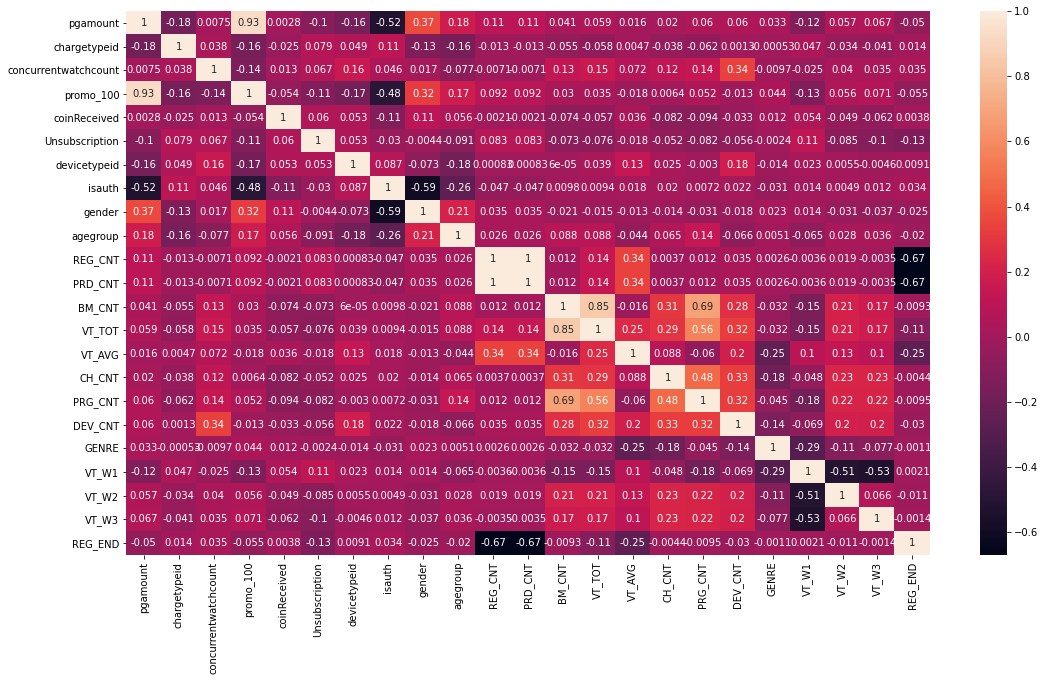

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(18,10))
sns.heatmap(service_bookmark.corr(), annot=True)   

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1,

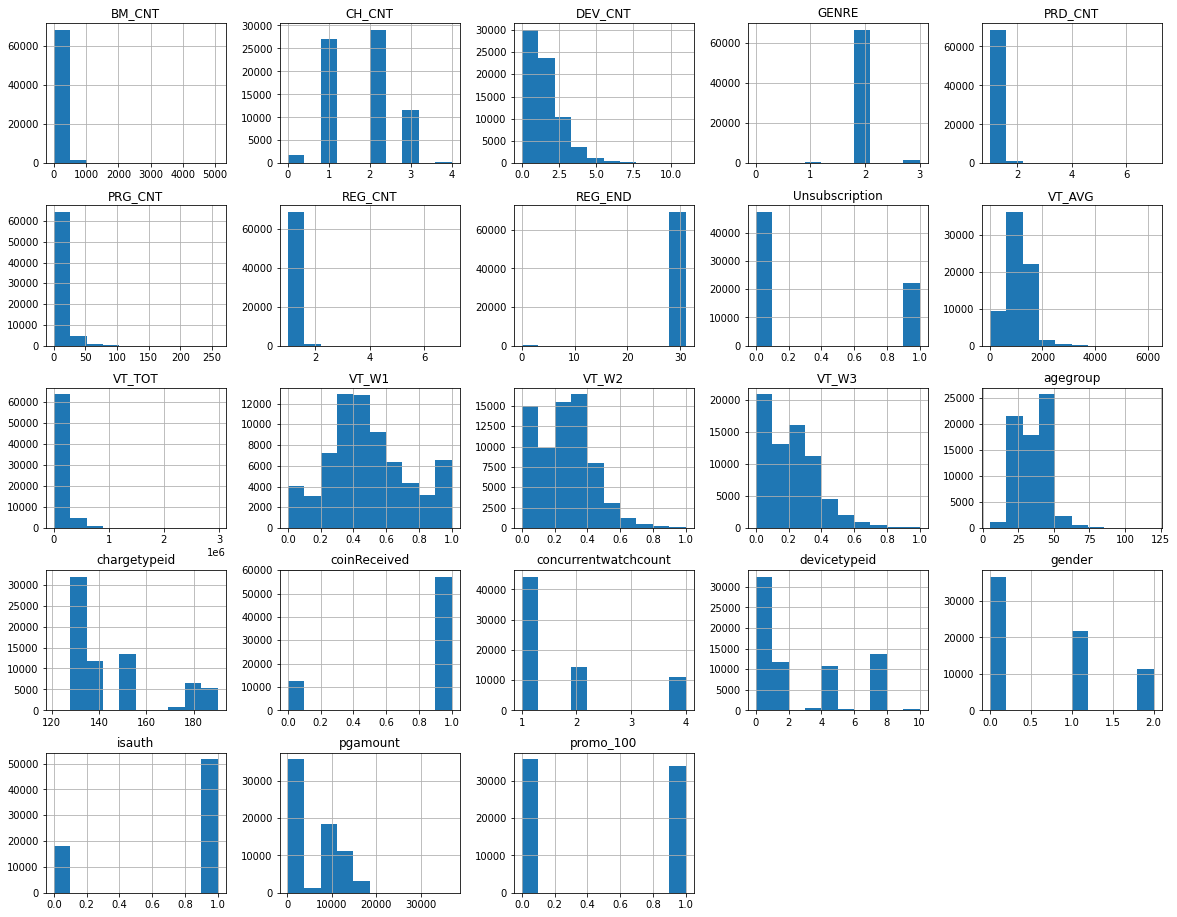

In [51]:
service_bookmark.hist(figsize=(20,16))
plt.show()

## predict service data 가공

In [52]:
predict_service = pd.read_csv("Predict/predict_service.csv", parse_dates=['registerdate','enddate'], infer_datetime_format=True)
predict_bookmark = pd.read_csv("Predict/predict_bookmark.csv", parse_dates=['dates'], infer_datetime_format=True)

df_predict_service = predict_service.copy()
df_predict_bookmark = predict_bookmark.copy()

In [53]:
df_predict_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 14 columns):
uno                     19001 non-null object
registerdate            19001 non-null datetime64[ns]
enddate                 19001 non-null datetime64[ns]
productcode             19001 non-null object
pgamount                19001 non-null float64
chargetypeid            19001 non-null int64
concurrentwatchcount    19001 non-null int64
promo_100               10019 non-null object
coinReceived            3220 non-null object
Repurchase              248 non-null object
devicetypeid            19001 non-null object
isauth                  14219 non-null object
gender                  16056 non-null object
agegroup                19001 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(3), object(8)
memory usage: 2.0+ MB


In [54]:
df_predict_bookmark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973560 entries, 0 to 1973559
Data columns (total 11 columns):
uno              object
dates            datetime64[ns]
hour             int64
channeltype      object
programid        object
title            object
contentid        object
contentnumber    object
section          object
viewtime         int64
devicetype       int64
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 165.6+ MB


In [55]:
predict_missing_info = pd.DataFrame(predict_service.isnull().sum().sort_values(ascending=False), columns=['missing num'])
predict_missing_info['%'] = predict_missing_info['missing num']/predict_service.shape[0]*100
predict_missing_info

,missing num,%
Repurchase,18753,98.694806
coinReceived,15781,83.053523
promo_100,8982,47.271196
isauth,4782,25.167096
gender,2945,15.499184
agegroup,0,0.000000
devicetypeid,0,0.000000
concurrentwatchcount,0,0.000000
chargetypeid,0,0.000000
pgamount,0,0.000000


In [56]:
# gender null --> N
df_predict_service['gender'] = df_predict_service['gender'].fillna('N')
df_predict_service['gender'].value_counts()

# agegroup outlier (0살, 950살) --> mean
df_predict_service['agegroup'].value_counts().sort_index()

age_mean = df_predict_service.loc[(df_predict_service['agegroup']<950) & (df_predict_service['agegroup']>0), 'agegroup'].mean()
age_mean

df_predict_service['agegroup'] = df_predict_service['agegroup'].replace(950, 30)
df_predict_service['agegroup'] = df_predict_service['agegroup'].replace(0, 30)
df_predict_service['agegroup'].value_counts().sort_index()

# pgamount US Dollar --> 원화
df_predict_service['pgamount'].value_counts().sort_index()

df_predict_service.loc[(df_predict_service['pgamount'] < 100), 'pgamount'] = df_predict_service['pgamount'] * 1120
df_predict_service['pgamount'].value_counts().sort_index()

# 나머지 결측치는 X로 처리 (O or null인 경우)
df_predict_service.isnull().sum()

df_predict_service = df_predict_service.fillna('X')
df_predict_service.isnull().sum()

uno                     0
registerdate            0
enddate                 0
productcode             0
pgamount                0
chargetypeid            0
concurrentwatchcount    0
promo_100               0
coinReceived            0
Repurchase              0
devicetypeid            0
isauth                  0
gender                  0
agegroup                0
dtype: int64

In [57]:
df_predict_service['Repurchase'].replace('O', 0, inplace=True)
df_predict_service['Repurchase'].replace('X', 1, inplace=True)
df_predict_service.rename(columns={'Repurchase':"Unsubscription"}, inplace=True)
df_predict_service.head(5)

column_list = df_predict_service.columns.values.tolist()
column_list.remove('uno')
column_list.remove('productcode')

for col in column_list:
    if df_predict_service[col].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(df_predict_service[col].values))
        df_predict_service[col] = lbl.transform(df_predict_service[col].values)
        
df_predict_service.sample(5)

df_predict_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 14 columns):
uno                     19001 non-null object
registerdate            19001 non-null datetime64[ns]
enddate                 19001 non-null datetime64[ns]
productcode             19001 non-null object
pgamount                19001 non-null float64
chargetypeid            19001 non-null int64
concurrentwatchcount    19001 non-null int64
promo_100               19001 non-null int32
coinReceived            19001 non-null int32
Unsubscription          19001 non-null int64
devicetypeid            19001 non-null int32
isauth                  19001 non-null int32
gender                  19001 non-null int32
agegroup                19001 non-null int64
dtypes: datetime64[ns](2), float64(1), int32(5), int64(4), object(2)
memory usage: 1.7+ MB


## predict bookmark data 가공

In [58]:
# (1) 고객별 서비스 가입 이력 수
pd_feature_1 = df_predict_service.groupby(by='uno', as_index=False).registerdate.count()
pd_feature_1.rename(columns={'registerdate':'REG_CNT'}, inplace=True)

# (2) 고객별 서비스 가입 이력 상품 수
pd_feature_2 = df_predict_service[['uno','productcode']]
pd_feature_2 = df_predict_service.drop_duplicates() # 고객별 동일 상품 제거
pd_feature_2 = df_predict_service.groupby(by='uno', as_index=False).productcode.count()
pd_feature_2.rename(columns={'productcode':'PRD_CNT'}, inplace=True)

# (3) 고객별 시청 건수 (1시간 단위)
pd_feature_3 = df_predict_bookmark.groupby(by='uno', as_index=False).dates.count()
pd_feature_3.rename(columns={'dates':'BM_CNT'}, inplace=True)

# (4) 고객별 시청 총 시간
pd_feature_4 = df_predict_bookmark.groupby(by='uno', as_index=False).viewtime.sum()
pd_feature_4.rename(columns={'viewtime':'VT_TOT'}, inplace=True)

# (5) 고객별 시청 평균 시간
pd_feature_5 = df_predict_bookmark.groupby(by='uno', as_index=False).viewtime.mean()
pd_feature_5.rename(columns={'viewtime':'VT_AVG'}, inplace=True)

# (6) 고객별 시청 채널 수
pd_feature_6 = df_predict_bookmark[['uno','channeltype']]
pd_feature_6 = pd_feature_6.drop_duplicates() # 고객별 동일 채널 제거
pd_feature_6 = pd_feature_6.groupby(by='uno', as_index=False).channeltype.count()
pd_feature_6.rename(columns={'channeltype':'CH_CNT'}, inplace=True)

# (7) 고객별 시청 프로그램 수
pd_feature_7 = df_predict_bookmark[['uno','programid']]
pd_feature_7 = pd_feature_7.drop_duplicates() # 고객별 동일 프로그램 제거
pd_feature_7 = pd_feature_7.groupby(by='uno', as_index=False).programid.count()
pd_feature_7.rename(columns={'programid':'PRG_CNT'}, inplace=True)

# (8) 고객별 시청 디바이스 수
pd_feature_8 = df_predict_bookmark[['uno','devicetype']]
pd_feature_8 = pd_feature_8.drop_duplicates() # 고객별 동일 프로그램 제거
pd_feature_8 = pd_feature_8.groupby(by='uno', as_index=False).devicetype.count()
pd_feature_8.rename(columns={'devicetype':'DEV_CNT'}, inplace=True)

In [59]:
# (9) enddate - registerdate
pd_feature_9 = df_predict_service[['uno', 'enddate', 'registerdate', 'Unsubscription']]
pd_feature_9['REG_END'] = pd_feature_9['enddate'] - pd_feature_9['registerdate']
pd_feature_9 = pd_feature_9[['uno', 'registerdate', 'REG_END']]

pd_feature_9['REG_END'] = pd_feature_9['REG_END'].astype('str')
pd_feature_9['REG_END'] = pd_feature_9.REG_END.str.split(' days').str[0]
pd_feature_9['REG_END'] = pd_feature_9['REG_END'].astype('int')

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
# # (10) enddate - lastview

# end_enddate = df_predict_service.groupby(by='uno', as_index=False).enddate.max()
# lastview = df_predict_bookmark.groupby(by='uno', as_index=False).dates.max()

# lastview_enddate = pd.merge(end_enddate, lastview, how='left')
# lastview_enddate.rename(columns={'dates':'last_view'}, inplace=True)
# lastview_enddate['LAST_V'] = lastview_enddate['enddate'] - lastview_enddate['last_view']
# lastview_enddate['LAST_V'] = lastview_enddate['LAST_V'].dt.days

# # lastview_enddate['LAST_V'] = lastview_enddate['LAST_V'].fillna(int(40))

# pd_feature_10 = lastview_enddate[['uno', 'LAST_V']]

# pd_feature_10.loc[pd_feature_10['LAST_V']<20, 'LAST_V'] = 0
# pd_feature_10.loc[pd_feature_10['LAST_V']>=20, 'LAST_V'] = 1
# pd_feature_10['LAST_V'] = pd_feature_10['LAST_V'].fillna(2)

In [61]:
# (11) 최다 장르

pd_feature_11 = pd.DataFrame(df_predict_bookmark.groupby(by=['uno']).channeltype.agg('max'))
pd_feature_11.rename(columns={'channeltype':'GENRE'}, inplace=True)

In [62]:
# (12) 주별 시청시간

pd_more_reg_uno = pd_feature_1[pd_feature_1['REG_CNT']>1]['uno']
pd_more_reg = df_predict_service[df_predict_service['uno'].isin(pd_more_reg_uno)].sort_values(by='uno')
pd_more_reg = pd.DataFrame(pd_more_reg.groupby(by=['uno'], as_index=False).registerdate.agg('max'))

pd_one_reg = df_predict_service[~df_predict_service['uno'].isin(pd_more_reg_uno)]
pd_one_reg = pd_one_reg[['uno', 'registerdate']]

pd_reg_date = pd.concat([pd_more_reg, pd_one_reg], axis=0)
pd_bookmark_reg_date = pd.merge(df_predict_bookmark, pd_reg_date, on='uno', how='left')
pd_bookmark_reg_date['from_reg'] = pd_bookmark_reg_date['dates']-pd_bookmark_reg_date['registerdate']

pd_week1 = pd_bookmark_reg_date[pd_bookmark_reg_date['from_reg']<timedelta(days=7)]
pd_week2 = pd_bookmark_reg_date[(pd_bookmark_reg_date['from_reg']>=timedelta(days=7))&(pd_bookmark_reg_date['from_reg']<timedelta(days=14))]
pd_week3 = pd_bookmark_reg_date[pd_bookmark_reg_date['from_reg']>timedelta(days=14)]

pd_week1_vt = pd_week1.groupby(by='uno', as_index=False).viewtime.sum()
pd_week1_vt.rename(columns={'viewtime':'VT_W1'}, inplace=True)
pd_week2_vt = pd_week2.groupby(by='uno', as_index=False).viewtime.sum()
pd_week2_vt.rename(columns={'viewtime':'VT_W2'}, inplace=True)
pd_week3_vt = pd_week3.groupby(by='uno', as_index=False).viewtime.sum()
pd_week3_vt.rename(columns={'viewtime':'VT_W3'}, inplace=True)

pd_feature_12 = pd.merge(pd_week1_vt, pd_week2_vt, on='uno', how='left')
pd_feature_12 = pd.merge(pd_feature_12, pd_week3_vt, on='uno', how='left')
pd_feature_12 = pd.merge(pd_feature_12, pd_feature_4, on='uno', how='left')

pd_feature_12['VT_W1'] = pd_feature_12['VT_W1']/pd_feature_12['VT_TOT']
pd_feature_12['VT_W2'] = pd_feature_12['VT_W2']/pd_feature_12['VT_TOT']
pd_feature_12['VT_W3'] = pd_feature_12['VT_W3']/pd_feature_12['VT_TOT']

pd_feature_12 = pd_feature_12[['uno', 'VT_W1', 'VT_W2', 'VT_W3']]

In [63]:
pd_service_bookmark = df_predict_service.copy()
feature_list = [pd_feature_1, pd_feature_2, pd_feature_3, pd_feature_4, pd_feature_5, pd_feature_6, 
                pd_feature_7, pd_feature_8, pd_feature_11, pd_feature_12]

for feature in feature_list:
    pd_service_bookmark = pd.merge(pd_service_bookmark, feature, on=['uno'], how='left')
    
pd_service_bookmark = pd.merge(pd_service_bookmark, pd_feature_9, on=['uno', 'registerdate'], how='left')
    
print(pd_service_bookmark.columns)
print(len(df_predict_service))
print(len(pd_service_bookmark))

pd_service_bookmark.isna().sum()

pd_service_bookmark['BM_CNT'] = pd_service_bookmark['BM_CNT'].fillna(0)
pd_service_bookmark['VT_TOT'] = pd_service_bookmark['VT_TOT'].fillna(0)
pd_service_bookmark['VT_AVG'] = pd_service_bookmark['VT_AVG'].fillna(0)
pd_service_bookmark['CH_CNT'] = pd_service_bookmark['CH_CNT'].fillna(0)
pd_service_bookmark['PRG_CNT'] = pd_service_bookmark['PRG_CNT'].fillna(0)
pd_service_bookmark['DEV_CNT'] = pd_service_bookmark['DEV_CNT'].fillna(0)
pd_service_bookmark['GENRE'] = pd_service_bookmark['GENRE'].fillna('X')
pd_service_bookmark['VT_W1'] = pd_service_bookmark['VT_W1'].fillna(0)
pd_service_bookmark['VT_W2'] = pd_service_bookmark['VT_W2'].fillna(0)
pd_service_bookmark['VT_W3'] = pd_service_bookmark['VT_W3'].fillna(0)

Index(['uno', 'registerdate', 'enddate', 'productcode', 'pgamount',
       'chargetypeid', 'concurrentwatchcount', 'promo_100', 'coinReceived',
       'Unsubscription', 'devicetypeid', 'isauth', 'gender', 'agegroup',
       'REG_CNT', 'PRD_CNT', 'BM_CNT', 'VT_TOT', 'VT_AVG', 'CH_CNT', 'PRG_CNT',
       'DEV_CNT', 'GENRE', 'VT_W1', 'VT_W2', 'VT_W3', 'REG_END'],
      dtype='object')
19001
19001


In [64]:
drop = ['uno', 'registerdate', 'enddate', 'productcode']
column_list = pd_service_bookmark.columns
column_list = column_list.drop(drop)

for col in column_list:
    if pd_service_bookmark[col].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(pd_service_bookmark[col].values))
        pd_service_bookmark[col] = lbl.transform(pd_service_bookmark[col].values)

In [65]:
pd_service_bookmark.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19001 entries, 0 to 19000
Data columns (total 27 columns):
uno                     19001 non-null object
registerdate            19001 non-null datetime64[ns]
enddate                 19001 non-null datetime64[ns]
productcode             19001 non-null object
pgamount                19001 non-null float64
chargetypeid            19001 non-null int64
concurrentwatchcount    19001 non-null int64
promo_100               19001 non-null int32
coinReceived            19001 non-null int32
Unsubscription          19001 non-null int64
devicetypeid            19001 non-null int32
isauth                  19001 non-null int32
gender                  19001 non-null int32
agegroup                19001 non-null int64
REG_CNT                 19001 non-null int64
PRD_CNT                 19001 non-null int64
BM_CNT                  19001 non-null float64
VT_TOT                  19001 non-null float64
VT_AVG                  19001 non-null float64
CH_CNT  

In [66]:
# pd_service_bookmark.describe()

In [67]:
# selected_columns

In [68]:
# scaler

In [69]:
# pd_service_bookmark[selected_columns] = scaler.transform(pd_service_bookmark[selected_columns])

In [70]:
service_bookmark.describe()

,pgamount,chargetypeid,concurrentwatchcount,promo_100,coinReceived,Unsubscription,devicetypeid,isauth,gender,agegroup,REG_CNT,PRD_CNT,BM_CNT,VT_TOT,VT_AVG,CH_CNT,PRG_CNT,DEV_CNT,GENRE,VT_W1,VT_W2,VT_W3,REG_END
count,69708.000000,69708.000000,69708.000000,69708.000000,69708.000000,69708.000000,69708.000000,69708.000000,69708.000000,69708.000000,69708.000000,69708.000000,69708.000000,6.970800e+04,69708.000000,69708.000000,69708.000000,69708.000000,69708.000000,69708.000000,69708.000000,69708.000000,69708.000000
mean,5106.464360,146.814383,1.688314,0.487448,0.819762,0.320709,2.249053,0.742053,0.639769,33.707681,1.017301,1.017301,113.290053,1.215187e+05,1081.795105,1.731423,9.987347,1.898548,2.006269,0.491455,0.259546,0.211586,30.756083
std,5491.874601,18.851249,1.086494,0.499846,0.384388,0.466753,2.803575,0.437508,0.748229,10.479527,0.151178,0.151178,143.535592,1.530446e+05,455.867448,0.775406,11.286394,1.116370,0.232813,0.251940,0.173840,0.169223,2.708413
min,100.000000,121.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,134.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,1.000000,1.000000,29.000000,3.012750e+04,833.783784,1.000000,3.000000,1.000000,2.000000,0.328625,0.131419,0.067769,31.000000
50%,100.000000,140.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,35.000000,1.000000,1.000000,71.000000,7.447000e+04,1100.346379,2.000000,6.000000,2.000000,2.000000,0.456452,0.269334,0.205200,31.000000
75%,10900.000000,151.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,40.000000,1.000000,1.000000,142.000000,1.530700e+05,1344.216590,2.000000,13.000000,2.000000,2.000000,0.643082,0.368793,0.313811,31.000000
max,36948.800000,190.000000,4.000000,1.000000,1.000000,1.000000,10.000000,1.000000,2.000000,120.000000,7.000000,7.000000,5071.000000,2.973760e+06,6226.666667,4.000000,259.000000,11.000000,3.000000,1.000000,0.999481,0.999267,31.000000


In [71]:
pd_service_bookmark.describe()

,pgamount,chargetypeid,concurrentwatchcount,promo_100,coinReceived,Unsubscription,devicetypeid,isauth,gender,agegroup,REG_CNT,PRD_CNT,BM_CNT,VT_TOT,VT_AVG,CH_CNT,PRG_CNT,DEV_CNT,GENRE,VT_W1,VT_W2,VT_W3,REG_END
count,19001.000000,19001.000000,19001.000000,19001.000000,19001.000000,19001.0,19001.000000,19001.000000,19001.000000,19001.000000,19001.000000,19001.000000,19001.000000,1.900100e+04,19001.000000,19001.000000,19001.000000,19001.000000,19001.000000,19001.000000,19001.000000,19001.000000,19001.000000
mean,4951.923141,146.799063,1.677649,0.472712,0.830535,1.0,1.618441,0.748329,0.620494,33.557707,1.028314,1.028314,105.536656,1.144394e+05,1104.497327,1.721962,9.601968,1.876270,2.001105,0.510055,0.269038,0.188909,30.619915
std,5452.144123,18.688452,1.080852,0.499268,0.375172,0.0,1.964711,0.433985,0.738575,10.392809,0.201150,0.201150,140.833769,1.481516e+05,478.683538,0.770923,11.118886,1.076498,0.237639,0.252262,0.179552,0.163943,3.330790
min,100.000000,121.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,134.000000,1.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,25.000000,1.000000,1.000000,26.000000,2.710000e+04,842.352941,1.000000,3.000000,1.000000,2.000000,0.343539,0.137829,0.041268,31.000000
50%,100.000000,140.000000,1.000000,0.000000,1.000000,1.0,1.000000,1.000000,0.000000,35.000000,1.000000,1.000000,64.000000,6.714000e+04,1113.125000,2.000000,6.000000,2.000000,2.000000,0.479220,0.278438,0.174910,31.000000
75%,10900.000000,151.000000,2.000000,1.000000,1.000000,1.0,3.000000,1.000000,1.000000,40.000000,1.000000,1.000000,132.000000,1.438500e+05,1364.705882,2.000000,12.000000,2.000000,2.000000,0.662908,0.381009,0.286223,31.000000
max,24628.800000,190.000000,4.000000,1.000000,1.000000,1.0,7.000000,1.000000,2.000000,95.000000,7.000000,7.000000,3366.000000,2.755030e+06,4752.125000,4.000000,280.000000,9.000000,3.000000,1.000000,0.998363,0.998946,31.000000


In [72]:
print(service_bookmark.shape, pd_service_bookmark.shape)

(69708, 27) (19001, 27)


In [73]:
service_bookmark.columns == pd_service_bookmark.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

## 예측용 데이터

In [74]:
drop_col = ['uno', 'registerdate', 'enddate', 'Unsubscription', 'productcode', 'GENRE']
X_predict = pd_service_bookmark.drop(drop_col, axis=1)

## Train data 쪼개기

In [75]:
# service_bookmark.to_csv('service_bookmark.xlsx', index=False)

In [76]:
X = service_bookmark.copy()
y = service_bookmark['Unsubscription']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [77]:
X_train.head(5)

,uno,registerdate,enddate,productcode,pgamount,chargetypeid,concurrentwatchcount,promo_100,coinReceived,Unsubscription,devicetypeid,isauth,gender,agegroup,REG_CNT,PRD_CNT,BM_CNT,VT_TOT,VT_AVG,CH_CNT,PRG_CNT,DEV_CNT,GENRE,VT_W1,VT_W2,VT_W3,REG_END
59638,87c9b64c51cb4d5334585e76cf88f4d9f81f5124a6ab69...,2021-03-10 06:38:46,2021-04-10 06:38:46,pk_1487,100.0,180,1,0,1,0,0,1,0,45,1,1,146.0,152400.0,1043.835616,2.0,6.0,1.0,2,0.248360,0.412927,0.338714,31
28358,3655947547aaa8246baa75827a60a9d067b970935e69cc...,2021-03-07 20:27:26,2021-04-07 20:27:26,pk_1487,100.0,134,1,0,1,0,4,1,1,25,1,1,45.0,52600.0,1168.888889,2.0,5.0,3.0,2,0.456274,0.472053,0.071673,31
30704,149dd147c2387c42d9dd1e8fd849868e643ab759ab73bc...,2021-03-11 01:50:31,2021-04-11 01:50:31,pk_1508,11188.8,140,1,1,1,1,1,0,2,40,1,1,27.0,40830.0,1512.222222,2.0,4.0,1.0,2,0.291452,0.424688,0.283860,31
37192,1915d5bf9a6c0779ac1d4adbbce11f03ff9e07a1d5aad1...,2021-03-10 02:36:27,2021-04-10 02:36:27,pk_1487,100.0,134,1,0,0,0,0,1,0,35,1,1,0.0,0.0,0.000000,0.0,0.0,0.0,3,0.000000,0.000000,0.000000,31
59565,e9ca1637ff044f8c63c5d244c3f453ee1f886b80dd3ed1...,2021-03-07 20:06:19,2021-04-07 20:06:19,pk_1487,7900.0,180,1,1,0,1,0,1,0,20,1,1,21.0,14260.0,679.047619,1.0,2.0,1.0,2,0.564516,0.435484,0.000000,31


In [78]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(55766, 27) (13942, 27)
(55766,) (13942,)


In [79]:
X_train_with = X_train.copy()
X_test_with = X_test.copy()

In [80]:
X_train = X_train.drop(drop_col, axis=1)
X_test = X_test.drop(drop_col, axis=1)

In [81]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(55766, 21) (13942, 21)
(55766,) (13942,)


## Xgboost

In [82]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier, plot_importance

In [83]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

In [84]:
#got the best parameters

param_grid = {
    'max_depth' : [7, 8, 9],
    'learning_rate' : [0.1, 0.05, 0.01],
#     'gamma' : [0, 0.05, 0.4, 0.5],
#     'reg_lambda' : [0, 1, 10, 20],
    'scale_pos_weight' : [1, 3, 5]  
}

xgb_model = GridSearchCV(
    estimator=XGBClassifier(objective = 'binary:logistic',
                            subsample = 0.9,
                            colsample_bytree = 0.5),
    param_grid=param_grid,
    scoring='f1',
    verbose=2,
    n_jobs=10,
    cv=3
)

In [85]:
#got the best parameters above

xgb_model.fit(X_train, y_train, verbose=True)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:   39.3s
[Parallel(n_jobs=10)]: Done  81 out of  81 | elapsed:  1.8min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.9,
                                     tree_method=None, v

In [86]:
xgb_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
best_xgb = xgb_model.best_estimator_
best_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Xgboost result

In [88]:
y_pred = best_xgb.predict(X_test)

In [89]:
print("f1 score: ", f1_score(y_test, y_pred), "\nAccuracy: ", accuracy_score(y_test, y_pred))

f1 score:  0.5435022895941891 
Accuracy:  0.585281882082915


Submission 2
* f1 score:  0.5419285604783075 
* Accuracy:  0.571367092239277

최다 장르 추가
* f1 score:  0.5391849529780564 
* Accuracy:  0.5677090804762588

최다 장르 추가, 주차별 시청
* f1 score:  0.5411377527033381 
* Accuracy:  0.5799741787404964

주차별 시청
* f1 score:  0.5433598989978695 
* Accuracy:  0.5849232534786974


In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.50      0.62      9472
           1       0.42      0.77      0.54      4470

    accuracy                           0.59     13942
   macro avg       0.62      0.63      0.58     13942
weighted avg       0.69      0.59      0.60     13942



In [91]:
confusion_matrix(y_test, y_pred)

array([[4718, 4754],
       [1028, 3442]], dtype=int64)

In [92]:
importance = best_xgb.feature_importances_
col = X_test.columns

for i in range(len(col)):
    print(col[i], importance[i])

pgamount 0.03972968
chargetypeid 0.034809846
concurrentwatchcount 0.07121399
promo_100 0.112872265
coinReceived 0.047042616
devicetypeid 0.025024435
isauth 0.08658006
gender 0.025783865
agegroup 0.050280474
REG_CNT 0.0529179
PRD_CNT 0.06578788
BM_CNT 0.012904945
VT_TOT 0.016087113
VT_AVG 0.015941987
CH_CNT 0.012540121
PRG_CNT 0.016622584
DEV_CNT 0.023395345
VT_W1 0.022060132
VT_W2 0.014504684
VT_W3 0.024700306
REG_END 0.22919974


## REG_END < 30인 경우 예측값을 1로 변경

In [ ]:
X_test_with.sample(5)

In [ ]:
len(X_test_with), len(y_pred)

In [ ]:
X_test_with = X_test_with.reset_index()
X_test_with.head(5)

In [ ]:
df_y_pred = pd.DataFrame(y_pred, columns=['y_pred'])
test_pred = pd.concat([X_test_with[['uno', 'productcode', 'REG_END']], df_y_pred], axis=1)

In [ ]:
test_pred[test_pred['REG_END']==0]

## 답안 Predict

In [ ]:
# 예측 모델에 최종 데이터 입력
y_pred = best_xgb.predict(X_predict)

# 데이터 건수 확인
print('예측 대상 건수 = ', len(X_predict), ', 예측 결과 건수 = ', len(y_pred))

In [ ]:
# 결과 제출 답안지 불러오기
df_sheet = pd.read_csv("Submission/CDS_submission.csv")
df_sheet.drop('CHURN', axis=1, inplace=True)
df_sheet.info()

In [ ]:
df_sheet.sample(5)

In [ ]:
# 답안지에 답안 표기
df_result = df_service_bookmark.loc[:,('uno','registerdate','productcode')]
df_result['KEY']   = df_result['uno'] + '|' + df_result['registerdate'].dt.strftime('%y-%m-%d %I:%M:%S') + '|' + df_result['productcode']   # 판다스 strftime()
df_result['CHURN'] = pd.DataFrame(y_pred)
df_result = df_result.loc[:,('KEY','CHURN')]
df_answer_sheet = pd.merge(df_sheet, df_result, on='KEY', how='left')
df_answer_sheet.info()

## 답안지 제출 파일 생성하기

In [ ]:
ds_answer_sheet = "CDS_submission_후렌치파이_7차.csv"
df_answer_sheet.to_csv(ds_answer_sheet, index=False, encoding='utf8')

In [ ]:
df_answer_sheet

In [ ]:
submission1 = pd.read_csv("CDS_submission_후렌치파이_7차.csv")

In [ ]:
len(submission1), len(df_answer_sheet)

## 답안 비율 확인

In [ ]:
sub1 = pd.read_csv("CDS_submission_후렌치파이_1차.csv")
sub2 = pd.read_csv("CDS_submission_후렌치파이_2차.csv")
# sub3 = pd.read_csv("CDS_submission_후렌치파이_3차.csv")
# sub4 = pd.read_csv("CDS_submission_후렌치파이_4차.csv")
sub5 = pd.read_csv("CDS_submission_후렌치파이_5차.csv")
# sub6 = pd.read_csv("CDS_submission_후렌치파이_6차.csv")

In [ ]:
print(sub1['CHURN'].value_counts(), '\n')
print(sub2['CHURN'].value_counts(), '\n')
# print(sub3['CHURN'].value_counts(), '\n')
print("\n")
print(sub5['CHURN'].value_counts(), '\n')
# print(sub6['CHURN'].value_counts(), '\n')
print(df_result['CHURN'].value_counts())

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
for i in range(7, 30):
    dt_model = DecisionTreeClassifier(random_state=47, max_depth=i)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    print("\nmax_depth: ", i, "\nf1 score: ", f1_score(y_test, y_pred), "\nAccuracy: ", accuracy_score(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
len(dt_model.feature_importances_)

In [ ]:
columns = X_train.columns
importances = dt_model.feature_importances_
col_iptc = dict()

for i in range(18):
    col_iptc[columns[i]] = importances[i]


In [ ]:
sorted(col_iptc, key=lambda x: col_iptc[x], reverse=True)

In [ ]:
col_iptc

In [ ]:
confusion_matrix(y_test, y_pred)

## code 데이터 읽기
  - content info
  - movie info

In [ ]:
df_content_info = pd.read_csv("Code/content_info.csv")
df_content_info.sample(3)

In [ ]:
df_movie_info = pd.read_csv("Code/movie_info.csv")
df_movie_info.sample(3)